
## 🔋 **Advanced SOC Estimation using Rendom Forest Regression**

🧠 We use Rendom Forest Regression to estimate the State of Charge (SOC) of a lithium-ion battery using data inspired by NASA's battery dataset.

🧠 We use Random Forest over LSTM for State of Charge (SoC) estimation because it provides a quicker, interpretable solution with minimal data preprocessing. It works well with smaller datasets, is robust to noise, and can handle non-linear relationships between features like voltage, current, and temperature without the need for sequential input. Additionally, its fast training time and suitability for real-time applications make it ideal for prototyping and scenarios where computational resources are limited.

---

### 🔗 Dataset:
**NASA Battery Data Set**: From NASA Ames Prognostics Data Repository

We'll simulate similar data here for demonstration. You can easily replace this with real CSV files from NASA's repository.


## 🔑 **Step 0: Import Libraries**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf



sns.set(style="whitegrid")


## 📁 **Step 1: Simulate Battery Data**

In [ ]:
battery_data = pd.read_csv('/content/Nasa_Battery_001.csv')
battery_data['Time_diff'] = battery_data['Time'].diff().fillna(0)
battery_data['Ah'] = (battery_data['Current_load'] * battery_data['Time_diff']) / 3600
battery_data['SOC'] = 100 - battery_data['Ah'].cumsum() / 2 * 100  # Assume 2 Ah battery

# Clip to keep SOC between 0 and 100
battery_data['SOC'] = battery_data['SOC'].clip(lower=0, upper=100)

# Drop NaNs or infinite values if any
battery_data = battery_data.dropna()

# Drop Columns
battery_data.drop(columns=['Current_load','Voltage_load','Time','Time_diff', 'Ah'], inplace=True)

df = pd.DataFrame({
   'Voltage': battery_data['Voltage_measured'],
   'Current': battery_data['Current_measured'],
   'Temperature': battery_data['Temperature_measured'],
   'SOC': battery_data['SOC']
})

##🧹 **Step 2: Preprocess and Sequence Data::**

In [ ]:
# Features and target
X = df[['Voltage', 'Current', 'Temperature']] # Removed 'Time' as it's not in df
y = df['SOC']

# Split into train and test sets
from sklearn.model_selection import train_test_split # import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🤖 **Step 3: Define and Train Rendom Forest Model**


In [ ]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 📊 **Step 4: Evaluate and Visualize Results**

Mean Absolute Error: 0.27
Root Mean Squared Error: 0.63
R² Score: 1.00


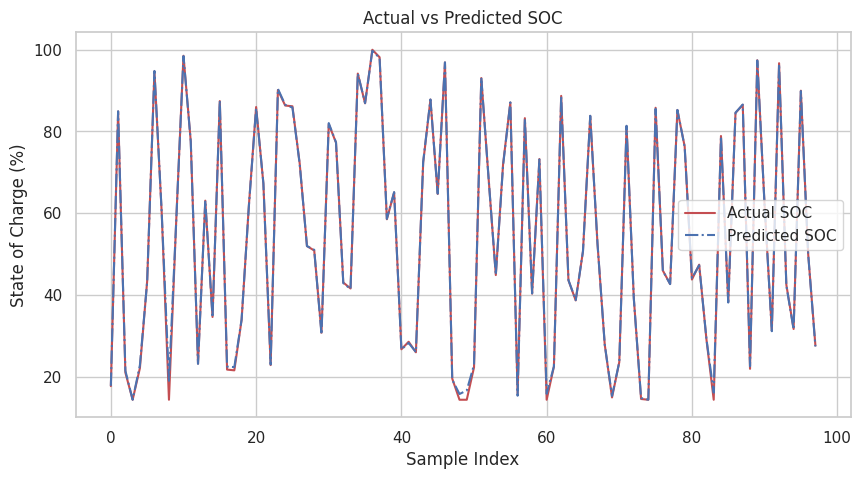

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual SOC', color='r')
plt.plot(y_pred, linestyle='dashdot', label='Predicted SOC', color='b')  # Dashed line
plt.title('Actual vs Predicted SOC')
plt.xlabel('Sample Index')
plt.ylabel('State of Charge (%)')
plt.legend()
plt.show()



## 📥 **Step 5: Predict SoC for other input**

In [ ]:
# Get user inputs
voltage = float(input("Enter battery voltage (V): "))
current = float(input("Enter battery current (A): "))
temperature = float(input("Enter battery temperature (°C): "))

input_data = pd.DataFrame({
    'Voltage': [voltage],
    'Current': [current],
    'Temperature': [temperature]
})

# Predict SOC using the trained model
predicted_soc = model.predict(input_data)

print(f"\nPredicted SOC: {predicted_soc[0]:.2f}%")